In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("m1.xlsx")
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [5]:
df.shape        # rows, columns


(28820, 23)

In [6]:
df.columns      # list of columns


Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'DEST', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity',
       'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT'],
      dtype='object')

In [7]:
df.head()       # preview first rows

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [9]:
# Check missing values in each column
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [11]:
# Get summary statistics for numerical columns
df.describe()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [12]:
# Check data types of each column
df.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
TAIL_NUM              object
DEST                  object
DEP_DELAY              int64
CRS_ELAPSED_TIME       int64
DISTANCE               int64
CRS_DEP_M              int64
DEP_TIME_M             int64
CRS_ARR_M              int64
Temperature            int64
Dew Point             object
Humidity               int64
Wind                  object
Wind Speed             int64
Wind Gust              int64
Pressure             float64
Condition             object
sch_dep                int64
sch_arr                int64
TAXI_OUT               int64
dtype: object

Correlation of numeric features with DEP_DELAY:
 DEP_DELAY           1.000000
CRS_DEP_M           0.102384
DEP_TIME_M          0.072340
Wind Speed          0.067718
MONTH               0.046455
Wind Gust           0.044340
CRS_ARR_M           0.043691
TAXI_OUT            0.034881
DAY_OF_WEEK        -0.006203
sch_arr            -0.006949
Humidity           -0.011776
CRS_ELAPSED_TIME   -0.030871
DISTANCE           -0.031507
Temperature        -0.032261
DAY_OF_MONTH       -0.036618
Pressure           -0.064939
sch_dep            -0.065452
Name: DEP_DELAY, dtype: float64


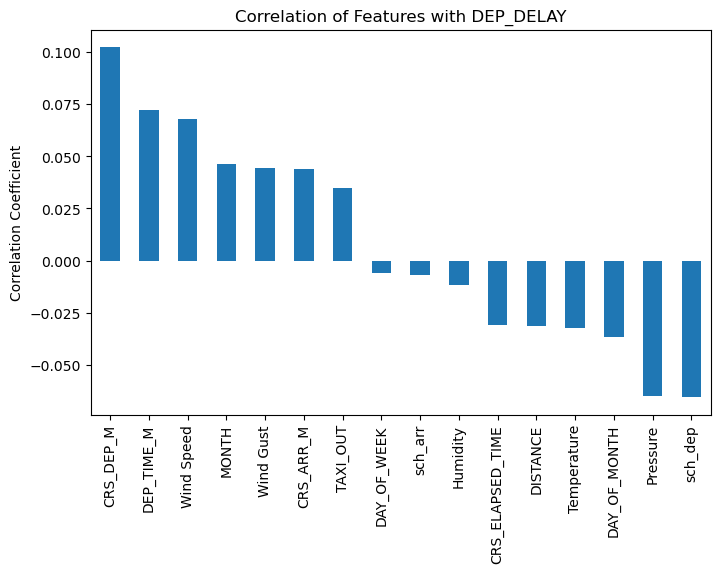

In [14]:
# Choose numeric columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Correlation matrix
corr = df[num_cols].corr()

# Focus on correlation with departure delay
delay_corr = corr["DEP_DELAY"].sort_values(ascending=False)
print("Correlation of numeric features with DEP_DELAY:\n", delay_corr)

# Plot correlation as bar chart
plt.figure(figsize=(8,5))
delay_corr.drop("DEP_DELAY").plot(kind="bar")
plt.title("Correlation of Features with DEP_DELAY")
plt.ylabel("Correlation Coefficient")
plt.show()

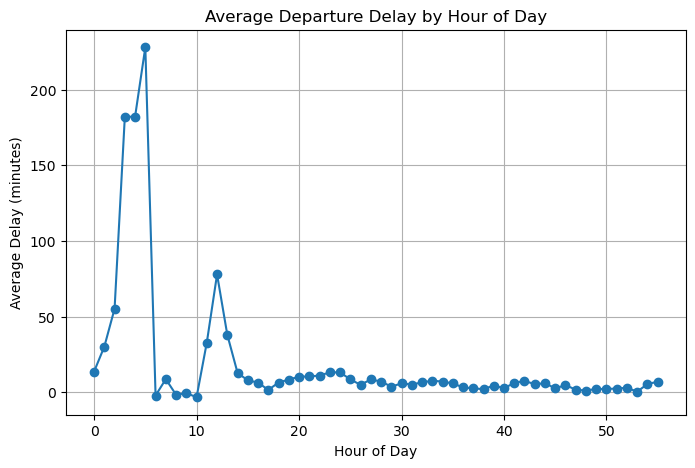

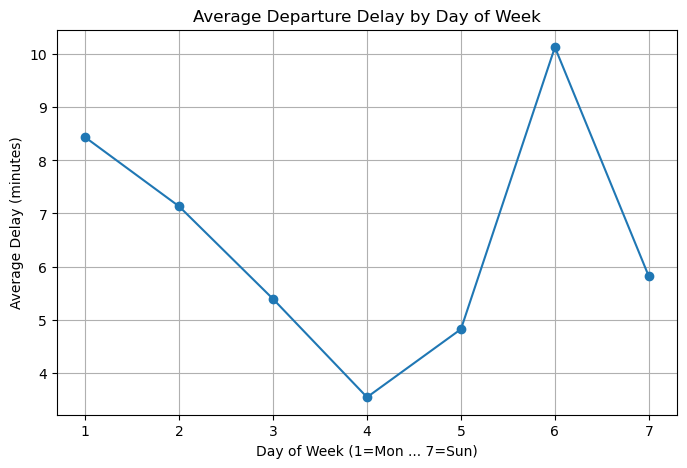

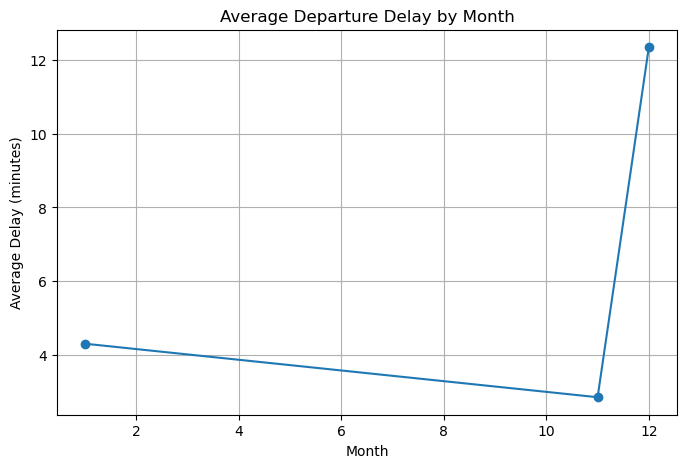

In [15]:
# --- Average delay by hour of day ---
if "sch_dep" in df.columns:
    df["HOUR_OF_DAY"] = df["sch_dep"]
elif "CRS_DEP_M" in df.columns:
    df["HOUR_OF_DAY"] = (df["CRS_DEP_M"] // 60).astype(int)

avg_delay_hour = df.groupby("HOUR_OF_DAY")["DEP_DELAY"].mean()

plt.figure(figsize=(8,5))
avg_delay_hour.plot(kind="line", marker="o")
plt.title("Average Departure Delay by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Delay (minutes)")
plt.grid(True)
plt.show()

# --- Average delay by day of week ---
avg_delay_dow = df.groupby("DAY_OF_WEEK")["DEP_DELAY"].mean()

plt.figure(figsize=(8,5))
avg_delay_dow.plot(kind="line", marker="o")
plt.title("Average Departure Delay by Day of Week")
plt.xlabel("Day of Week (1=Mon ... 7=Sun)")
plt.ylabel("Average Delay (minutes)")
plt.grid(True)
plt.show()

# --- Average delay by month ---
avg_delay_month = df.groupby("MONTH")["DEP_DELAY"].mean()

plt.figure(figsize=(8,5))
avg_delay_month.plot(kind="line", marker="o")
plt.title("Average Departure Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.grid(True)
plt.show()


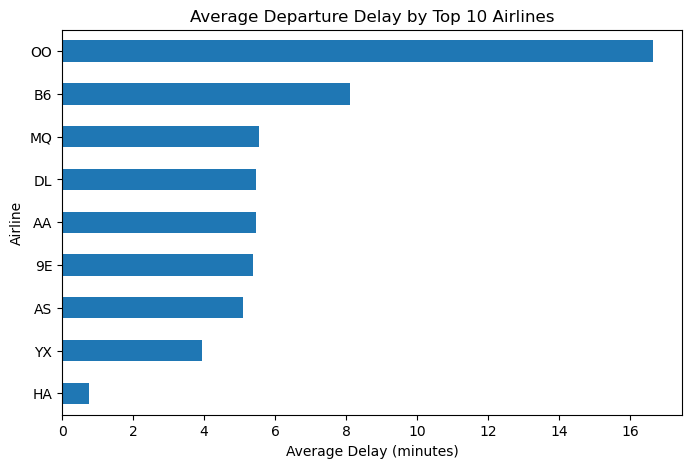

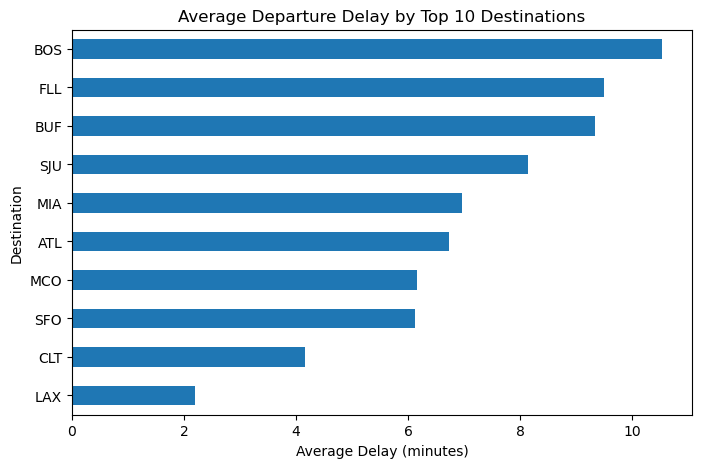

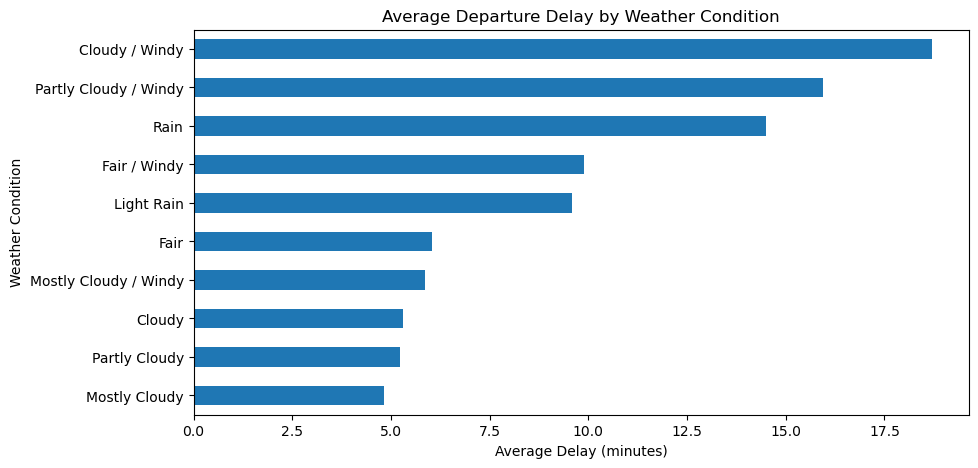

In [16]:
# --- Average delay by airline (top 10 carriers) ---
top_airlines = df["OP_UNIQUE_CARRIER"].value_counts().head(10).index
avg_delay_airline = df[df["OP_UNIQUE_CARRIER"].isin(top_airlines)].groupby("OP_UNIQUE_CARRIER")["DEP_DELAY"].mean()

plt.figure(figsize=(8,5))
avg_delay_airline.sort_values().plot(kind="barh")
plt.title("Average Departure Delay by Top 10 Airlines")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Airline")
plt.show()

# --- Average delay by destination (top 10 airports) ---
top_dest = df["DEST"].value_counts().head(10).index
avg_delay_dest = df[df["DEST"].isin(top_dest)].groupby("DEST")["DEP_DELAY"].mean()

plt.figure(figsize=(8,5))
avg_delay_dest.sort_values().plot(kind="barh")
plt.title("Average Departure Delay by Top 10 Destinations")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Destination")
plt.show()

# --- Average delay by weather condition (top 10) ---
top_conditions = df["Condition"].value_counts().head(10).index
avg_delay_condition = df[df["Condition"].isin(top_conditions)].groupby("Condition")["DEP_DELAY"].mean()

plt.figure(figsize=(10,5))
avg_delay_condition.sort_values().plot(kind="barh")
plt.title("Average Departure Delay by Weather Condition")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Weather Condition")
plt.show()


In [17]:
# Target variable
target = "DEP_DELAY"

# Start with numeric features
features = ["DISTANCE", "CRS_ELAPSED_TIME", "TAXI_OUT",
            "Temperature", "Humidity", "Wind Speed", "Wind Gust", "Pressure"]

# Add hour of day if available
if "sch_dep" in df.columns:
    df["HOUR_OF_DAY"] = df["sch_dep"]
elif "CRS_DEP_M" in df.columns:
    df["HOUR_OF_DAY"] = (df["CRS_DEP_M"] // 60).astype(int)
features.append("HOUR_OF_DAY")

# Encode top 5 airlines, destinations, and weather conditions as dummy variables
def add_top_dummies(col, top_k=5):
    top_vals = df[col].value_counts().head(top_k).index
    for v in top_vals:
        df[f"{col}_{v}"] = (df[col] == v).astype(int)
    return [f"{col}_{v}" for v in top_vals]

features += add_top_dummies("OP_UNIQUE_CARRIER", 5)
features += add_top_dummies("DEST", 5)
features += add_top_dummies("Condition", 5)

# Prepare data
X = df[features].fillna(0).values.astype(float)
y = df[target].values.astype(float)

# Standardize (mean=0, std=1)
X_mean, X_std = X.mean(axis=0), X.std(axis=0) + 1e-9
Xz = (X - X_mean) / X_std
y_mean, y_std = y.mean(), y.std() + 1e-9
yz = (y - y_mean) / y_std

# Linear regression via least squares
coef = np.linalg.lstsq(Xz, yz, rcond=None)[0]

# Importance ranking
importance = pd.DataFrame({
    "feature": features,
    "importance": coef
}).assign(abs_importance=lambda d: d["importance"].abs()) \
  .sort_values("abs_importance", ascending=False)

print("Top factors influencing DEP_DELAY:")
print(importance.head(15))


Top factors influencing DEP_DELAY:
                    feature  importance  abs_importance
0                  DISTANCE   -0.387698        0.387698
1          CRS_ELAPSED_TIME    0.365656        0.365656
8               HOUR_OF_DAY   -0.073786        0.073786
7                  Pressure   -0.064140        0.064140
3               Temperature   -0.051607        0.051607
5                Wind Speed    0.050248        0.050248
9      OP_UNIQUE_CARRIER_B6    0.045860        0.045860
2                  TAXI_OUT    0.040669        0.040669
14                 DEST_LAX   -0.031094        0.031094
10     OP_UNIQUE_CARRIER_DL    0.019041        0.019041
6                 Wind Gust   -0.015536        0.015536
19  Condition_Mostly Cloudy   -0.014773        0.014773
21         Condition_Cloudy   -0.013576        0.013576
16                 DEST_BOS    0.012516        0.012516
11     OP_UNIQUE_CARRIER_9E   -0.011196        0.011196


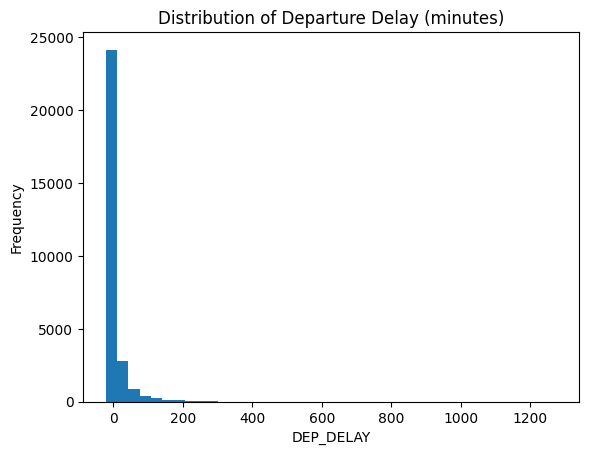

In [9]:
plt.hist(df['DEP_DELAY'], bins=40)
plt.title("Distribution of Departure Delay (minutes)")
plt.xlabel("DEP_DELAY")
plt.ylabel("Frequency")
plt.show()


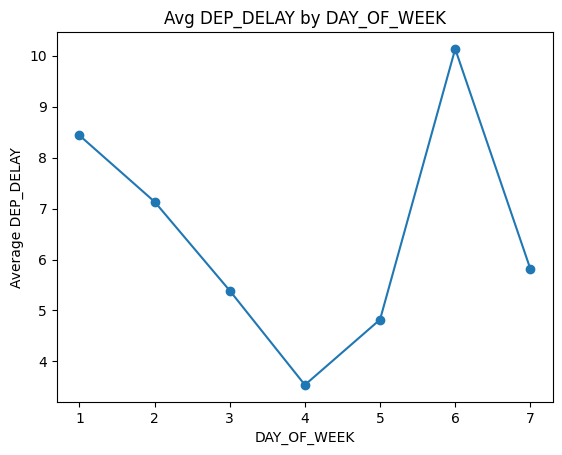

In [10]:
avg_by_dow = df.groupby('DAY_OF_WEEK')['DEP_DELAY'].mean().sort_index()
plt.plot(avg_by_dow.values, marker='o')
plt.title("Avg DEP_DELAY by DAY_OF_WEEK")
plt.xlabel("DAY_OF_WEEK")
plt.ylabel("Average DEP_DELAY")
plt.xticks(range(len(avg_by_dow)), avg_by_dow.index)
plt.show()


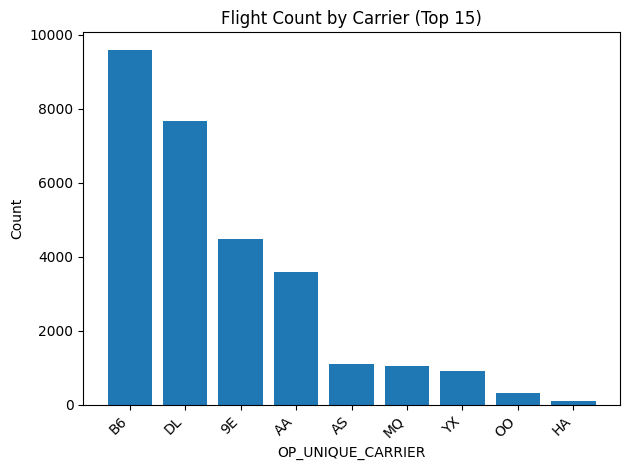

In [11]:
counts = df['OP_UNIQUE_CARRIER'].value_counts().head(15)
plt.bar(counts.index, counts.values)
plt.title("Flight Count by Carrier (Top 15)")
plt.xlabel("OP_UNIQUE_CARRIER")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


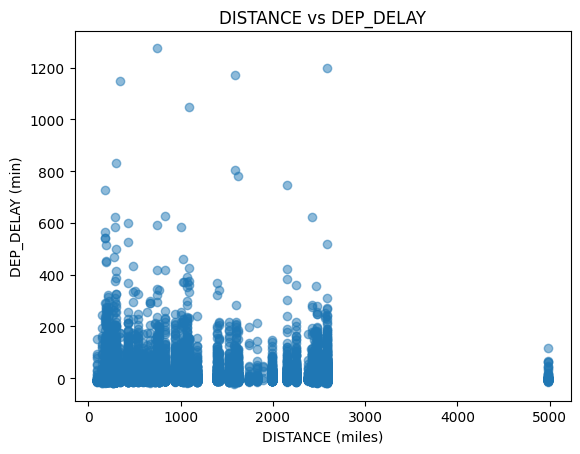

In [12]:
plt.scatter(df['DISTANCE'], df['DEP_DELAY'], alpha=0.5)
plt.title("DISTANCE vs DEP_DELAY")
plt.xlabel("DISTANCE (miles)")
plt.ylabel("DEP_DELAY (min)")
plt.show()


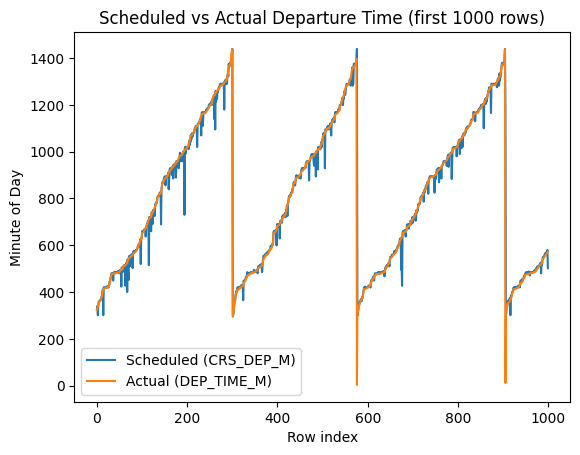

In [13]:
plt.plot(df['CRS_DEP_M'][:1000], label='Scheduled (CRS_DEP_M)')
plt.plot(df['DEP_TIME_M'][:1000], label='Actual (DEP_TIME_M)')
plt.title("Scheduled vs Actual Departure Time (first 1000 rows)")
plt.xlabel("Row index")
plt.ylabel("Minute of Day")
plt.legend()
plt.show()


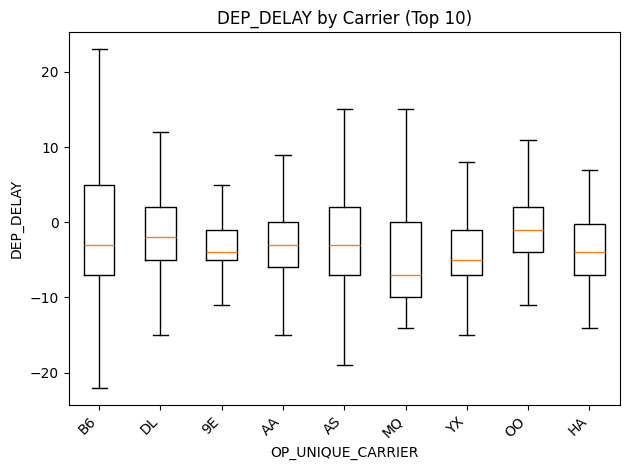

In [14]:
carriers = df['OP_UNIQUE_CARRIER'].value_counts().head(10).index
data = [df.loc[df['OP_UNIQUE_CARRIER']==c, 'DEP_DELAY'].dropna() for c in carriers]
plt.boxplot(data, labels=carriers, showfliers=False)
plt.title("DEP_DELAY by Carrier (Top 10)")
plt.xlabel("OP_UNIQUE_CARRIER")
plt.ylabel("DEP_DELAY")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


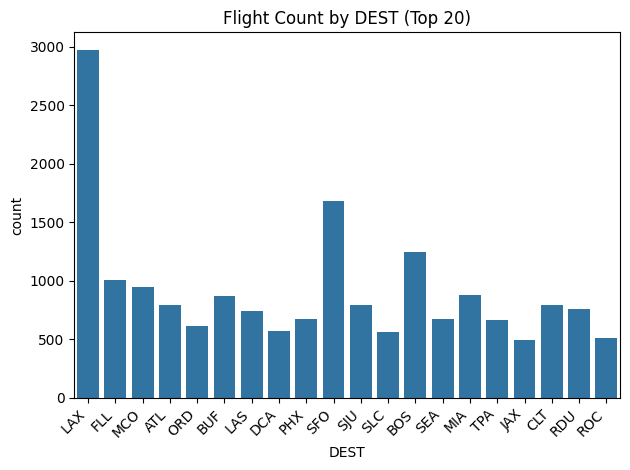

In [17]:
top_dest = df['DEST'].value_counts().head(20).index
sns.countplot(x='DEST', data=df[df['DEST'].isin(top_dest)])
plt.title("Flight Count by DEST (Top 20)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


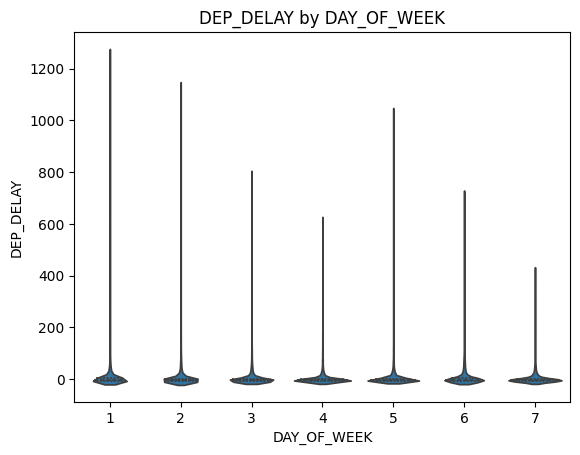

In [18]:
sns.violinplot(x='DAY_OF_WEEK', y='DEP_DELAY', data=df, cut=0, inner='quartile')
plt.title("DEP_DELAY by DAY_OF_WEEK")
plt.show()


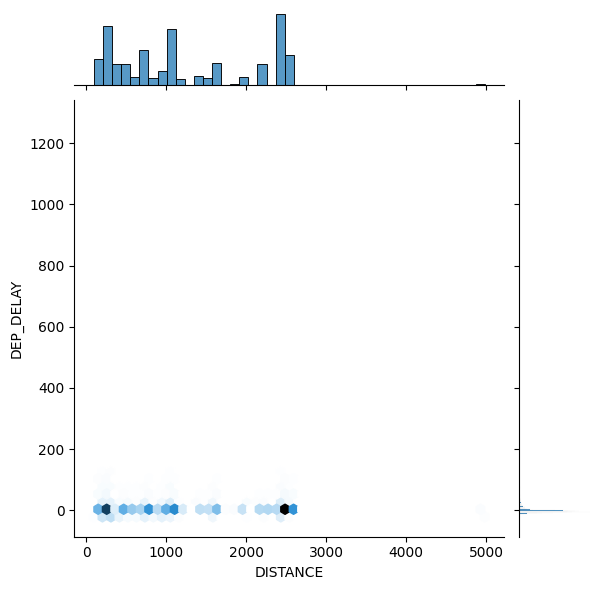

In [19]:
sns.jointplot(x='DISTANCE', y='DEP_DELAY', data=df, kind='hex')


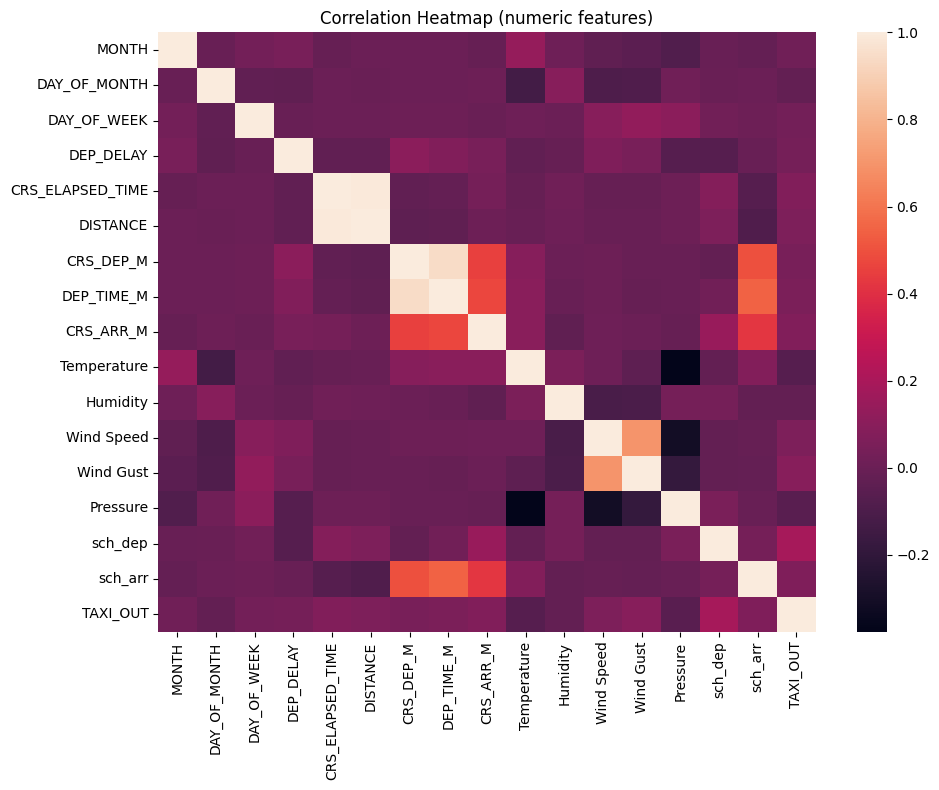

In [20]:
num_cols = df.select_dtypes(include='number').columns
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False)
plt.title("Correlation Heatmap (numeric features)")
plt.tight_layout()
plt.show()


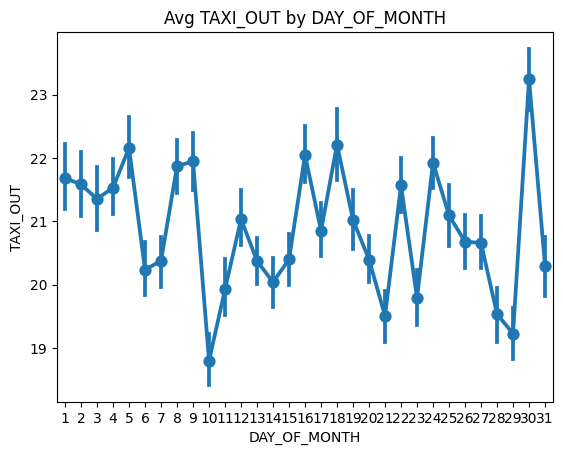

In [22]:
sns.pointplot(x='DAY_OF_MONTH', y='TAXI_OUT', data=df, errorbar=('ci', 95))
plt.title("Avg TAXI_OUT by DAY_OF_MONTH")
plt.show()


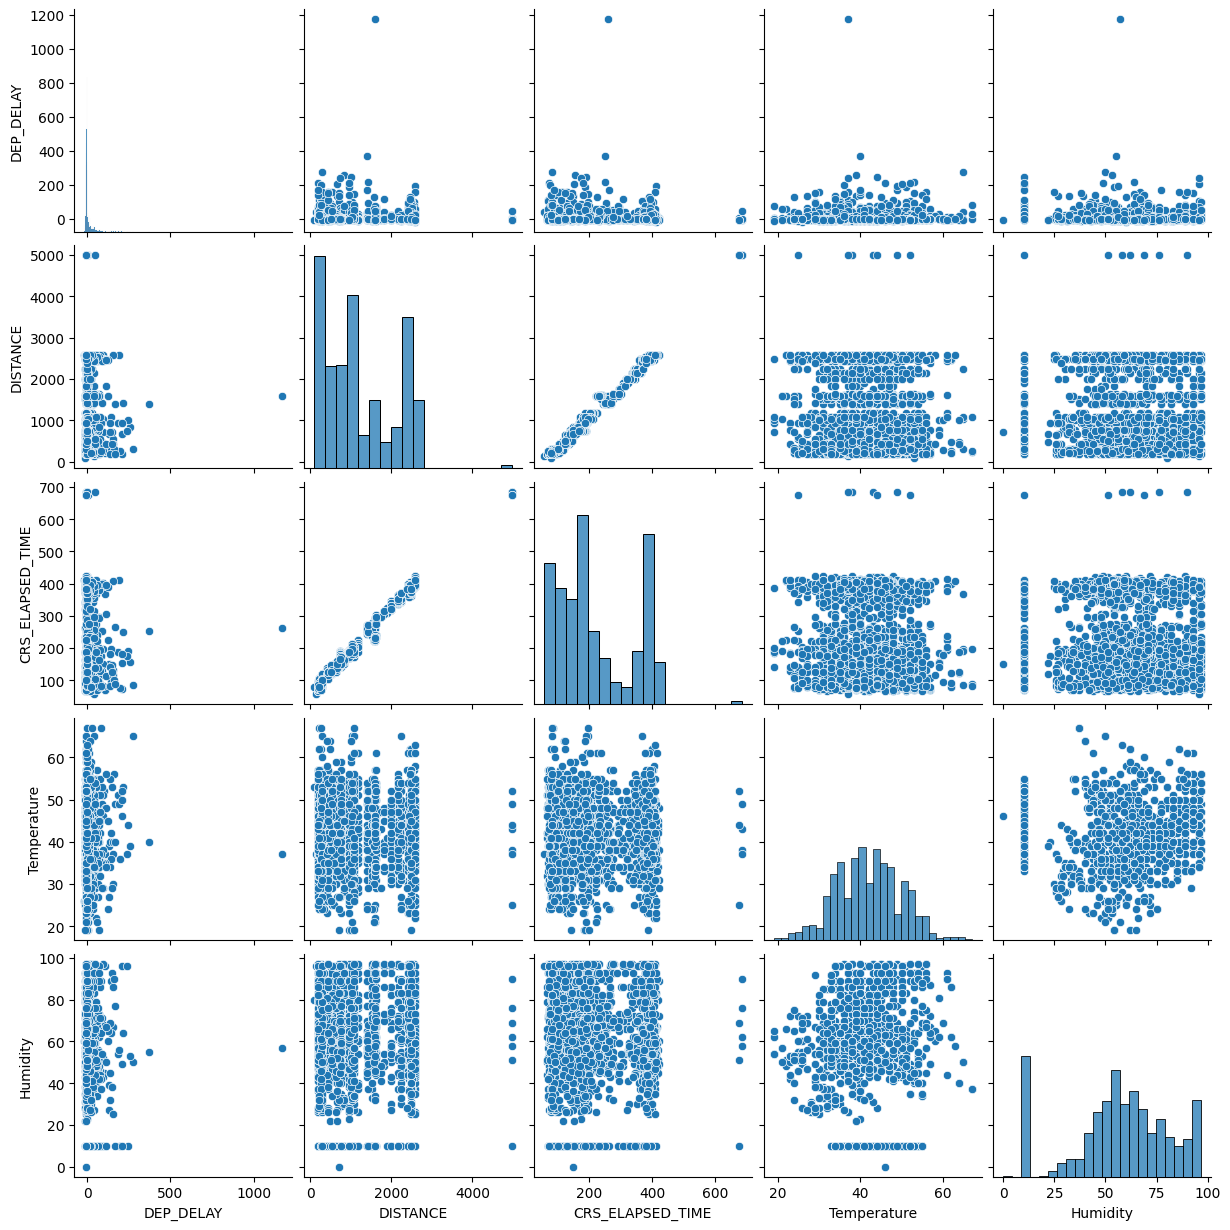

In [23]:
subset = df[['DEP_DELAY','DISTANCE','CRS_ELAPSED_TIME','Temperature','Humidity']].dropna().sample(n=min(2000, len(df)))
sns.pairplot(subset)
plt.show()


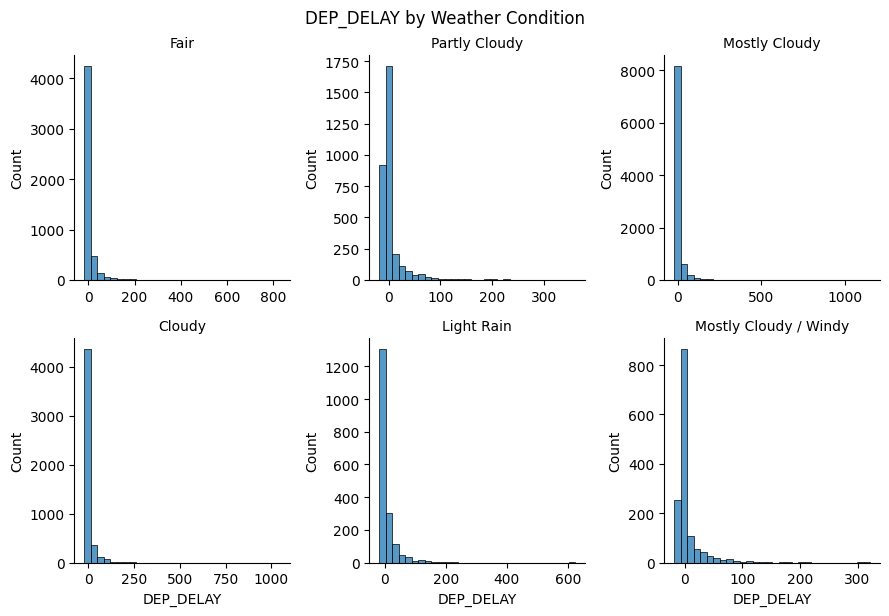

In [24]:
cond_top = df['Condition'].value_counts().head(6).index
g = sns.FacetGrid(df[df['Condition'].isin(cond_top)], col="Condition", col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="DEP_DELAY", bins=30)
g.set_titles("{col_name}")
g.fig.suptitle("DEP_DELAY by Weather Condition", y=1.02)
plt.show()
